In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [108]:
Boundary = gpd.read_file('../data/PA/City_Plan_Boundary.geojson')
Census_group = gpd.read_file('../data/PA/Census_Block_Groups_2010.geojson')

288

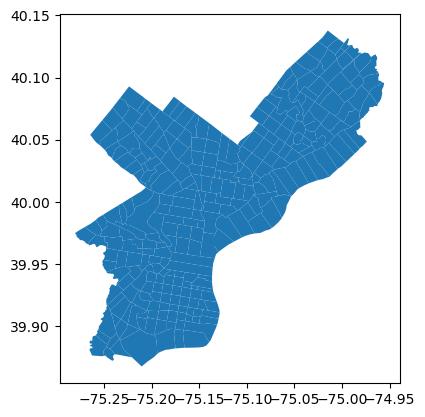

In [225]:
Boundary.plot()
len(Boundary)

1336

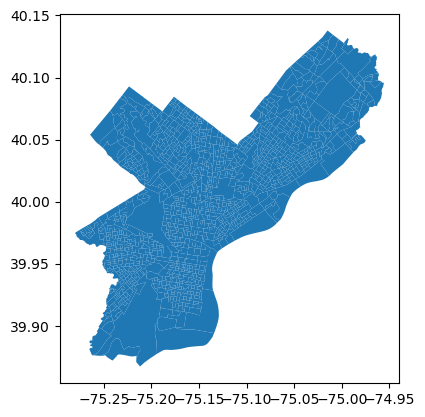

In [229]:
Census_group.plot()
len(Census_group)

17315

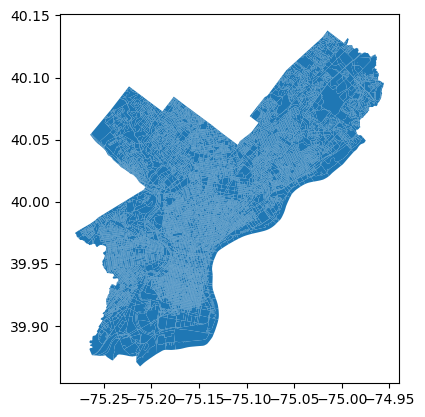

In [18]:
Census = gpd.read_file('../data/PA/Census_Blocks_2000.geojson')
Census.plot()
len(Census)

## Data Cleaning

In [81]:
def merge_demand(file, year, quarter):
    trip = pd.read_csv(file)
    start_count = trip.groupby('Start_OBJECTID').count()['trip_id']
    end_count = trip.groupby('End_OBJECTID').count()['trip_id']
    start_count = pd.DataFrame(start_count)
    end_count = pd.DataFrame(end_count)
    
    # 修改列名
    start_count.columns = [f'{year}_q{quarter}_start_count']
    end_count.columns = [f'{year}_q{quarter}_end_count']
    
    # merge两个dataframes到demand，取并集
    global demand
    demand = pd.merge(demand, start_count, how='outer', left_index=True, right_index=True)
    demand = pd.merge(demand, end_count, how='outer', left_index=True, right_index=True)

In [82]:
file = '../data/PA/share_bike_CBG/indego-trips-2019-q1_CBG.csv'
year = 2019
quarter = 1

trip = pd.read_csv(file)
start_count = trip.groupby('Start_OBJECTID').count()['trip_id']
end_count = trip.groupby('End_OBJECTID').count()['trip_id']
start_count = pd.DataFrame(start_count)
end_count = pd.DataFrame(end_count)

# 修改列名
start_count.columns = [f'{year}_q{quarter}_start_count']
end_count.columns = [f'{year}_q{quarter}_end_count']

demand = pd.merge(start_count, end_count, how='outer', left_index=True, right_index=True)

In [83]:
merge_demand('../data/PA/share_bike_CBG/indego-trips-2019-q4_CBG.csv', 2019, 4)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2019-q3_CBG.csv', 2019, 3)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2019-q2_CBG.csv', 2019, 2)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2020-q1_CBG.csv', 2020, 1)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2020-q2_CBG.csv', 2020, 2)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2020-q3_CBG.csv', 2020, 3)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2020-q4_CBG.csv', 2020, 4)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2021-q1_CBG.csv', 2021, 1)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2021-q2_CBG.csv', 2021, 2)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2021-q3_CBG.csv', 2021, 3)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2021-q4_CBG.csv', 2021, 4)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2022-q1_CBG.csv', 2022, 1)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2022-q2_CBG.csv', 2022, 2)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2022-q3_CBG.csv', 2022, 3)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2022-q4_CBG.csv', 2022, 4)
merge_demand('../data/PA/share_bike_CBG/indego-trips-2023-q1_CBG.csv', 2023, 1)

/var/folders/tw/gz2w91cj3fj4x6fqjsqpt1m80000gn/T/ipykernel_57157/1008688260.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  trip = pd.read_csv(file)
/var/folders/tw/gz2w91cj3fj4x6fqjsqpt1m80000gn/T/ipykernel_57157/1008688260.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  trip = pd.read_csv(file)
/var/folders/tw/gz2w91cj3fj4x6fqjsqpt1m80000gn/T/ipykernel_57157/1008688260.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  trip = pd.read_csv(file)
/var/folders/tw/gz2w91cj3fj4x6fqjsqpt1m80000gn/T/ipykernel_57157/1008688260.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  trip = pd.read_csv(file)
/var/folders/tw/gz2w91cj3fj4x6fqjsqpt1m80000gn/T/ipykernel_57157/1008688260.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or

In [84]:
# fill na with 0
demand = demand.fillna(0)

In [87]:
demand

,2019_q1_start_count,2019_q1_end_count,2019_q4_start_count,2019_q4_end_count,2019_q3_start_count,2019_q3_end_count,2019_q2_start_count,2019_q2_end_count,2020_q1_start_count,2020_q1_end_count,...,2022_q1_end_count,2022_q2_start_count,2022_q2_end_count,2022_q3_start_count,2022_q3_end_count,2022_q4_start_count,2022_q4_end_count,2023_q1_start_count,2023_q1_end_count,demand_index
10.0,79.0,67.0,192.0,169.0,471.0,469.0,236.0,212.0,83.0,89.0,...,84.0,221.0,216.0,396.0,394.0,162.0,189.0,164.0,157.0,10
53.0,135.0,135.0,338.0,334.0,595.0,542.0,677.0,604.0,233.0,239.0,...,301.0,720.0,694.0,490.0,467.0,255.0,252.0,209.0,222.0,53
67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,52.0,67
68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,6.0,148.0,178.0,140.0,145.0,24.0,28.0,68
122.0,769.0,805.0,977.0,994.0,2065.0,2076.0,1719.0,1742.0,674.0,662.0,...,434.0,1105.0,1102.0,1251.0,1244.0,792.0,827.0,595.0,656.0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326.0,496.0,616.0,704.0,834.0,1485.0,1634.0,1190.0,1414.0,522.0,626.0,...,646.0,1518.0,1608.0,1564.0,1717.0,907.0,1011.0,743.0,883.0,1326
1327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,307.0,738.0,734.0,602.0,578.0,471.0,470.0,362.0,355.0,1327
1328.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,8.0,178.0,165.0,192.0,151.0,166.0,126.0,1328
1333.0,142.0,163.0,358.0,362.0,765.0,750.0,320.0,316.0,231.0,241.0,...,377.0,773.0,841.0,813.0,831.0,568.0,617.0,514.0,555.0,1333


In [86]:
# make the demand index a new column as type int64
demand['demand_index'] = demand.index.astype('int64')

In [65]:
demand.sum()

2019_q1_start_count     96593.0
2019_q1_end_count       95062.0
2019_q4_start_count    166072.0
2019_q4_end_count      163446.0
2019_q3_start_count    274847.0
2019_q3_end_count      271753.0
2019_q2_start_count    206325.0
2019_q2_end_count      203741.0
2020_q1_start_count    118175.0
2020_q1_end_count      116063.0
2020_q2_start_count    186581.0
2020_q2_end_count      183424.0
2020_q3_start_count    269983.0
2020_q3_end_count      264365.0
2020_q4_start_count    160398.0
2020_q4_end_count      156753.0
2021_q1_start_count     96276.0
2021_q1_end_count       93778.0
2021_q2_start_count    232189.0
2021_q2_end_count      227807.0
2021_q3_start_count    300412.0
2021_q3_end_count      296273.0
2021_q4_start_count    330216.0
2021_q4_end_count      325675.0
2022_q1_start_count    129053.0
2022_q1_end_count      126654.0
2022_q2_start_count    257347.0
2022_q2_end_count      253259.0
2022_q3_start_count    312372.0
2022_q3_end_count      307807.0
2022_q4_start_count    206984.0
2022_q4_

In [66]:
demand.to_csv('../data/PA/share_bike_CBG/demand2019to2020CBG.csv')

## show the demand on the map

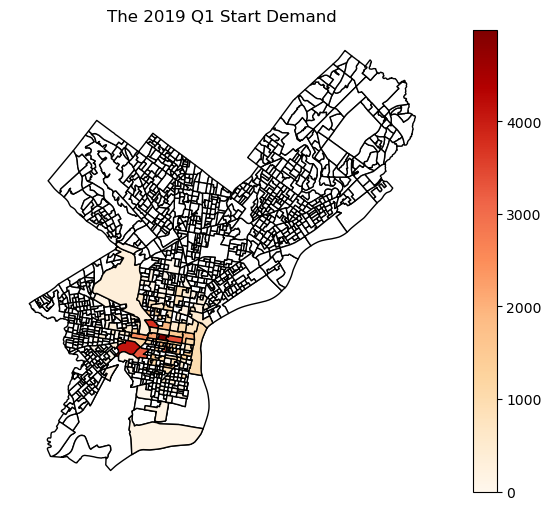

In [111]:
# plot demand
demand_distribution = Census_group.merge(demand, left_on='OBJECTID', right_on='demand_index', how='left')
fig, ax = plt.subplots(1, figsize=(10, 6))
Census_group.plot(ax=ax, color='white', edgecolor='black')
demand_distribution.plot(ax=ax, column='2019_q1_start_count', cmap='OrRd', edgecolor='black', legend=True)
ax.set_title('The 2019 Q1 Start Demand')
ax.set_axis_off()
plt.show()

## show the distribution of the number of business in each tractce

In [9]:
business = pd.read_csv('../data/PA/business_Phi_label.csv')
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,OBJECTID,CBGID
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",272.0,130.0
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",272.0,123.0
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",180.0,938.0
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",180.0,939.0
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",100.0,567.0


In [10]:
business_count = business.groupby('CBGID').count()['business_id']
business_count = pd.DataFrame(business_count)
# rename the column
business_count.columns = ['business_count']
business_count.reset_index(level=0,inplace=True)
business_count['CBGID'] = business_count['CBGID'].astype('int64')
business_count.head()

,CBGID,business_count
0,6,2
1,7,3
2,8,3
3,9,4
4,10,16


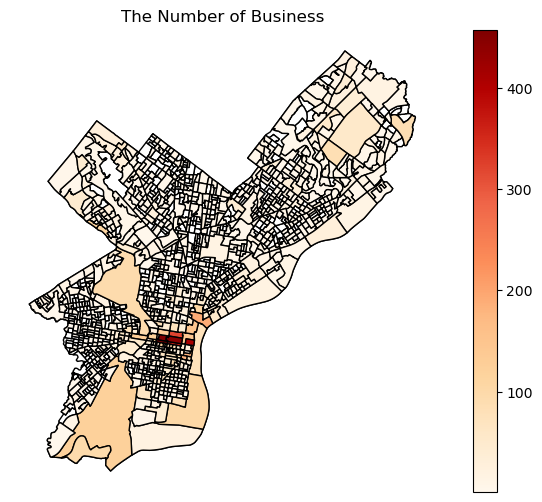

In [113]:
Business_distribution = Census_group.merge(business_count, left_on='OBJECTID', right_on='CBGID', how='left')
fig, ax = plt.subplots(1, figsize=(10, 6))
Census_group.plot(ax=ax, color='white', edgecolor='black')
Business_distribution.plot(ax=ax, column='business_count', cmap='OrRd', edgecolor='black', legend=True)
ax.set_title('The Number of Business' )
ax.set_axis_off()
plt.show()

In [90]:
demand = pd.read_csv("../data/PA/share_bike_CBG/demand2019to2020CBG.csv",index_col=0)
demand.fillna(0,inplace=True)
demand

,2019_q1_start_count,2019_q1_end_count,2019_q4_start_count,2019_q4_end_count,2019_q3_start_count,2019_q3_end_count,2019_q2_start_count,2019_q2_end_count,2020_q1_start_count,2020_q1_end_count,...,2022_q1_end_count,2022_q2_start_count,2022_q2_end_count,2022_q3_start_count,2022_q3_end_count,2022_q4_start_count,2022_q4_end_count,2023_q1_start_count,2023_q1_end_count,demand_index
10.0,79.0,67.0,192.0,169.0,471.0,469.0,236.0,212.0,83.0,89.0,...,84.0,221.0,216.0,396.0,394.0,162.0,189.0,164.0,157.0,10
53.0,135.0,135.0,338.0,334.0,595.0,542.0,677.0,604.0,233.0,239.0,...,301.0,720.0,694.0,490.0,467.0,255.0,252.0,209.0,222.0,53
67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,52.0,67
68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,6.0,148.0,178.0,140.0,145.0,24.0,28.0,68
122.0,769.0,805.0,977.0,994.0,2065.0,2076.0,1719.0,1742.0,674.0,662.0,...,434.0,1105.0,1102.0,1251.0,1244.0,792.0,827.0,595.0,656.0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326.0,496.0,616.0,704.0,834.0,1485.0,1634.0,1190.0,1414.0,522.0,626.0,...,646.0,1518.0,1608.0,1564.0,1717.0,907.0,1011.0,743.0,883.0,1326
1327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,307.0,738.0,734.0,602.0,578.0,471.0,470.0,362.0,355.0,1327
1328.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,8.0,178.0,165.0,192.0,151.0,166.0,126.0,1328
1333.0,142.0,163.0,358.0,362.0,765.0,750.0,320.0,316.0,231.0,241.0,...,377.0,773.0,841.0,813.0,831.0,568.0,617.0,514.0,555.0,1333


In [91]:
# get the mean demand of each quarter
demand_mean = demand[['2020_q1_start_count', '2020_q1_end_count', '2020_q2_start_count', '2020_q2_end_count', '2020_q3_start_count', '2020_q3_end_count', '2020_q4_start_count', '2020_q4_end_count', '2021_q1_start_count', '2021_q1_end_count', '2021_q2_start_count', '2021_q2_end_count', '2021_q3_start_count', '2021_q3_end_count', '2021_q4_start_count', '2021_q4_end_count', '2022_q1_start_count', '2022_q1_end_count', '2022_q2_start_count', '2022_q2_end_count', '2022_q3_start_count', '2022_q3_end_count', '2022_q4_start_count', '2022_q4_end_count', '2023_q1_start_count', '2023_q1_end_count']]
demand_mean['Quarter_demand'] = demand_mean.apply(lambda x: x.mean(), axis=1)
# index to column
demand_mean.reset_index(level=0,inplace=True)
demand_mean

/var/folders/tw/gz2w91cj3fj4x6fqjsqpt1m80000gn/T/ipykernel_57157/3915570893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_mean['Quarter_demand'] = demand_mean.apply(lambda x: x.mean(), axis=1)


,index,2020_q1_start_count,2020_q1_end_count,2020_q2_start_count,2020_q2_end_count,2020_q3_start_count,2020_q3_end_count,2020_q4_start_count,2020_q4_end_count,2021_q1_start_count,...,2022_q1_end_count,2022_q2_start_count,2022_q2_end_count,2022_q3_start_count,2022_q3_end_count,2022_q4_start_count,2022_q4_end_count,2023_q1_start_count,2023_q1_end_count,Quarter_demand
0,10.0,83.0,89.0,474.0,484.0,437.0,428.0,146.0,142.0,55.0,...,84.0,221.0,216.0,396.0,394.0,162.0,189.0,164.0,157.0,236.230769
1,53.0,233.0,239.0,1187.0,1183.0,1700.0,1749.0,938.0,942.0,549.0,...,301.0,720.0,694.0,490.0,467.0,255.0,252.0,209.0,222.0,737.269231
2,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,52.0,4.115385
3,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,6.0,148.0,178.0,140.0,145.0,24.0,28.0,25.961538
4,122.0,674.0,662.0,1174.0,1189.0,2148.0,2158.0,1316.0,1323.0,783.0,...,434.0,1105.0,1102.0,1251.0,1244.0,792.0,827.0,595.0,656.0,1148.730769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,1326.0,522.0,626.0,1080.0,1111.0,1664.0,1705.0,726.0,824.0,367.0,...,646.0,1518.0,1608.0,1564.0,1717.0,907.0,1011.0,743.0,883.0,1101.384615
143,1327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,307.0,738.0,734.0,602.0,578.0,471.0,470.0,362.0,355.0,232.961538
144,1328.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,8.0,178.0,165.0,192.0,151.0,166.0,126.0,38.346154
145,1333.0,231.0,241.0,441.0,428.0,740.0,754.0,388.0,361.0,199.0,...,377.0,773.0,841.0,813.0,831.0,568.0,617.0,514.0,555.0,573.000000


## show the embeddings

In [2]:
def str2vec(embedding_string):
    embedding_string = embedding_string.replace('[', '').replace(']', '')  # Remove square brackets
    embedding_string = embedding_string.replace('\n', '')  # Remove line break
    embedding_list = embedding_string.split()  # Split string by space
    embedding_vector = np.array(embedding_list, dtype=np.float32)  # Convert list to numpy array of floats
    return embedding_vector

### OpenAI embeddings

In [11]:
# read npy file
poi_embeddings = np.load('../data/PA/poi_embeddings.npy')

In [12]:
poi_embeddings = pd.DataFrame(poi_embeddings)

In [21]:
poi_embeddings.shape

(12247, 1536)

In [132]:
business.shape

(14569, 16)

In [5]:
business_info = pd.read_csv('../data/yelp_dataset-2/business_Phi_info.csv')
business_info.shape

(12247, 3)

In [13]:
business_poi = pd.read_csv('../data/yelp_dataset-2/business_Phi_info.csv')
poi_embeddings['business_id'] = business_poi['business_id']

In [14]:
poi_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,1527,1528,1529,1530,1531,1532,1533,1534,1535,business_id
0,-0.006852,0.008814,0.000569,-0.013993,-0.017298,0.005592,0.028013,-0.007224,-0.032888,-0.016265,...,-0.002961,0.022600,0.011975,-0.035312,0.020796,-0.032420,0.009792,-0.014667,-0.025093,--OS_I7dnABrXvRCCuWOGQ
1,-0.014156,-0.016827,-0.000455,-0.009675,-0.025025,-0.004720,0.001438,-0.006179,-0.017243,-0.029977,...,0.027306,0.010527,-0.011667,-0.032929,0.012244,-0.003804,0.008970,-0.024650,-0.038001,--sXnWH9Xm6_NvIjyuA99w
2,0.008924,-0.005784,0.008031,-0.016529,-0.027534,-0.000923,0.020884,-0.010964,-0.006822,-0.019414,...,0.028798,0.016955,-0.009700,-0.023564,0.025748,-0.015004,-0.012414,-0.032755,-0.032206,-0M0b-XhtFagyLmsBtOe8w
3,0.001950,-0.004120,-0.002840,-0.002131,-0.019651,0.014235,0.013691,-0.008744,-0.002553,-0.027381,...,0.015585,0.031750,-0.021538,-0.016633,0.022903,-0.021607,-0.016853,-0.012147,-0.033486,-0TffRSXXIlBYVbb5AwfTg
4,-0.012341,-0.005623,0.008024,-0.013713,-0.023781,0.009278,0.004102,-0.016810,-0.020330,-0.029075,...,0.006586,0.030766,-0.015618,-0.021286,0.017295,-0.032844,-0.002571,-0.022949,-0.034369,-0eUa8TsXFFy0FCxHYmrjg


In [15]:
# get the OBJECTID from the business dataframe, combine with the poi_embeddings
business_cbg = business[['business_id', 'CBGID']]
poi_embeddings = poi_embeddings.merge(business_cbg, left_on='business_id', right_on='business_id', how='left')
poi_embeddings.to_csv('../data/PA/poi_embeddings_CBG.csv', index=False)

In [16]:
poi_embeddings

,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,business_id,CBGID
0,-0.006852,0.008814,0.000569,-0.013993,-0.017298,0.005592,0.028013,-0.007224,-0.032888,-0.016265,...,0.022600,0.011975,-0.035312,0.020796,-0.032420,0.009792,-0.014667,-0.025093,--OS_I7dnABrXvRCCuWOGQ,483.0
1,-0.014156,-0.016827,-0.000455,-0.009675,-0.025025,-0.004720,0.001438,-0.006179,-0.017243,-0.029977,...,0.010527,-0.011667,-0.032929,0.012244,-0.003804,0.008970,-0.024650,-0.038001,--sXnWH9Xm6_NvIjyuA99w,934.0
2,0.008924,-0.005784,0.008031,-0.016529,-0.027534,-0.000923,0.020884,-0.010964,-0.006822,-0.019414,...,0.016955,-0.009700,-0.023564,0.025748,-0.015004,-0.012414,-0.032755,-0.032206,-0M0b-XhtFagyLmsBtOe8w,673.0
3,0.001950,-0.004120,-0.002840,-0.002131,-0.019651,0.014235,0.013691,-0.008744,-0.002553,-0.027381,...,0.031750,-0.021538,-0.016633,0.022903,-0.021607,-0.016853,-0.012147,-0.033486,-0TffRSXXIlBYVbb5AwfTg,316.0
4,-0.012341,-0.005623,0.008024,-0.013713,-0.023781,0.009278,0.004102,-0.016810,-0.020330,-0.029075,...,0.030766,-0.015618,-0.021286,0.017295,-0.032844,-0.002571,-0.022949,-0.034369,-0eUa8TsXFFy0FCxHYmrjg,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12242,0.011285,-0.002581,0.009935,-0.021568,-0.025913,0.005957,-0.008063,-0.038883,-0.015510,-0.008029,...,0.052174,-0.008838,-0.023252,0.031449,-0.031529,0.000683,-0.008190,-0.029202,zy2p8yfx_fgXMCCUo8nWsA,130.0
12243,-0.006722,0.001079,-0.000382,-0.029725,-0.015056,0.012960,0.022459,-0.014419,-0.008614,-0.010137,...,0.024632,-0.005739,-0.051451,0.023995,-0.050482,0.009735,-0.001744,-0.052364,zy_g2wKTNIB7EQdG73_Xaw,302.0
12244,-0.008711,0.000333,0.021926,-0.039388,-0.033191,-0.004697,-0.005350,-0.023581,-0.004474,-0.019878,...,0.031826,-0.009020,-0.032456,-0.008784,-0.007353,-0.023620,0.017725,-0.026180,zyge4T5eSiPHq1-IaJb_Qg,229.0
12245,-0.023452,0.007114,0.015440,-0.030471,-0.031832,0.032648,0.010760,-0.007557,-0.019834,-0.029193,...,0.024173,-0.003340,-0.014365,0.027669,-0.001785,-0.008454,-0.006506,-0.040157,zyghhZzPgb1bRAIYB-oi1w,887.0


In [42]:
# calculate the mean of each OBJECTID of the embedding
poi_embeddings_mean = poi_embeddings.groupby('CBGID')
poi_embeddings_mean = poi_embeddings_mean[poi_embeddings.columns[0:1535]].mean()
poi_embeddings_mean = pd.DataFrame(poi_embeddings_mean)
poi_embeddings_mean.reset_index(level=0, inplace=True)
poi_embeddings_mean['CBGID'] = poi_embeddings_mean['CBGID'].astype('int64')
poi_embeddings_mean

,CBGID,0,1,2,3,4,5,6,7,8,...,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534
0,6,-0.016032,-0.002126,0.009575,-0.032469,-0.028813,0.007131,0.009596,-0.010811,-0.021926,...,0.012129,0.008649,-0.003669,0.030001,-0.001400,-0.027422,0.021932,-0.021116,-0.009106,-0.009966
1,7,-0.004043,-0.003526,0.009116,-0.022150,-0.020954,-0.003388,0.018182,-0.018645,-0.013641,...,0.031860,0.005637,0.010475,0.026817,-0.008020,-0.019599,0.011890,-0.015620,-0.006893,-0.006475
2,8,-0.010226,-0.001867,0.015886,-0.017826,-0.023971,0.012504,0.016648,-0.020014,-0.017281,...,0.027679,0.006656,-0.005178,0.036029,0.002298,-0.018626,0.019283,-0.008949,0.000945,-0.007993
3,9,-0.007564,-0.022271,-0.008851,-0.020922,-0.023452,0.000583,0.016991,-0.019692,-0.010732,...,0.021595,-0.000111,0.005306,0.020636,-0.003879,-0.023676,0.027257,-0.023068,-0.023064,-0.013556
4,10,-0.006739,-0.011707,0.001218,-0.024844,-0.018639,0.012279,0.009191,-0.022685,-0.009824,...,0.014365,0.002395,-0.003422,0.026999,-0.012578,-0.020621,0.017484,-0.019119,-0.008078,-0.011887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1327,-0.002372,-0.014931,0.001120,-0.028965,-0.014024,0.011322,-0.012080,-0.020298,-0.010399,...,0.012454,-0.003159,-0.001502,0.036174,-0.007793,-0.016649,0.019100,-0.010953,-0.020299,0.003923
981,1332,-0.019058,-0.005055,0.001321,-0.028956,-0.007817,0.009369,0.010006,-0.022467,-0.018746,...,0.012490,0.006013,-0.002835,0.022733,-0.013565,-0.027302,0.012397,-0.014002,-0.010797,-0.006533
982,1333,-0.015521,-0.002823,0.006989,-0.019291,-0.031892,0.006647,0.017672,-0.016253,-0.017376,...,0.026139,0.011223,-0.000368,0.034143,-0.012342,-0.026345,0.024622,-0.025852,-0.015478,-0.018178
983,1334,-0.005600,-0.008011,0.003556,-0.021008,-0.021802,0.009441,0.004458,-0.020842,-0.010872,...,0.011875,0.008446,0.001746,0.021914,-0.010083,-0.021737,0.020312,-0.018849,-0.009708,-0.008913


## Quarter Bike Demand

In [92]:
# Combine the poi_embeddings_mean with the demand mean
demand_poi = demand_mean.merge(poi_embeddings_mean, left_on='index', right_on='CBGID', how='inner')
# drop the na rows
demand_poi = demand_poi.fillna(0)
demand_poi

,index,2020_q1_start_count,2020_q1_end_count,2020_q2_start_count,2020_q2_end_count,2020_q3_start_count,2020_q3_end_count,2020_q4_start_count,2020_q4_end_count,2021_q1_start_count,...,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534
0,10.0,83.0,89.0,474.0,484.0,437.0,428.0,146.0,142.0,55.0,...,0.014365,0.002395,-0.003422,0.026999,-0.012578,-0.020621,0.017484,-0.019119,-0.008078,-0.011887
1,53.0,233.0,239.0,1187.0,1183.0,1700.0,1749.0,938.0,942.0,549.0,...,0.016686,0.006926,0.004699,0.027852,-0.018894,-0.024247,0.016783,-0.028008,-0.004574,-0.012387
2,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012687,-0.003319,-0.007047,0.035180,-0.008496,-0.015966,0.021078,-0.022021,-0.007693,-0.004466
3,122.0,674.0,662.0,1174.0,1189.0,2148.0,2158.0,1316.0,1323.0,783.0,...,0.013183,0.005599,-0.003205,0.023493,-0.013137,-0.028443,0.015695,-0.013398,0.001164,-0.008580
4,123.0,1794.0,1916.0,3011.0,2884.0,5136.0,5103.0,3263.0,3201.0,1803.0,...,0.012325,0.004436,0.002551,0.025767,-0.011446,-0.023912,0.015978,-0.018936,-0.003946,-0.009310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1324.0,1090.0,976.0,1837.0,1839.0,2099.0,2074.0,1621.0,1576.0,1196.0,...,0.016525,-0.000047,-0.001812,0.026467,-0.008390,-0.019376,0.018060,-0.022873,-0.007134,-0.008641
132,1326.0,522.0,626.0,1080.0,1111.0,1664.0,1705.0,726.0,824.0,367.0,...,0.013692,0.003919,0.005326,0.024798,-0.013788,-0.021834,0.021863,-0.021771,-0.009059,-0.010642
133,1327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012454,-0.003159,-0.001502,0.036174,-0.007793,-0.016649,0.019100,-0.010953,-0.020299,0.003923
134,1333.0,231.0,241.0,441.0,428.0,740.0,754.0,388.0,361.0,199.0,...,0.026139,0.011223,-0.000368,0.034143,-0.012342,-0.026345,0.024622,-0.025852,-0.015478,-0.018178


In [93]:
X = demand_poi.iloc[:, 29:1564]
X

,0,1,2,3,4,5,6,7,8,9,...,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534
0,-0.006739,-0.011707,0.001218,-0.024844,-0.018639,0.012279,0.009191,-0.022685,-0.009824,-0.023706,...,0.014365,0.002395,-0.003422,0.026999,-0.012578,-0.020621,0.017484,-0.019119,-0.008078,-0.011887
1,-0.005278,-0.007800,0.007176,-0.026548,-0.018560,0.011935,0.010146,-0.020778,-0.015001,-0.023930,...,0.016686,0.006926,0.004699,0.027852,-0.018894,-0.024247,0.016783,-0.028008,-0.004574,-0.012387
2,-0.011070,-0.009135,0.004206,-0.026831,-0.007039,0.008606,0.005655,-0.031268,-0.008332,-0.023402,...,0.012687,-0.003319,-0.007047,0.035180,-0.008496,-0.015966,0.021078,-0.022021,-0.007693,-0.004466
3,-0.006514,-0.003846,-0.000072,-0.019807,-0.019145,0.013397,0.002822,-0.018777,-0.016814,-0.016983,...,0.013183,0.005599,-0.003205,0.023493,-0.013137,-0.028443,0.015695,-0.013398,0.001164,-0.008580
4,-0.008407,-0.006383,0.005331,-0.022651,-0.019820,0.012953,0.006085,-0.016916,-0.011781,-0.021502,...,0.012325,0.004436,0.002551,0.025767,-0.011446,-0.023912,0.015978,-0.018936,-0.003946,-0.009310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.011070,-0.012167,0.003452,-0.018065,-0.021373,0.002684,0.005411,-0.028186,-0.012657,-0.023699,...,0.016525,-0.000047,-0.001812,0.026467,-0.008390,-0.019376,0.018060,-0.022873,-0.007134,-0.008641
132,-0.004288,-0.009795,0.003956,-0.022886,-0.021529,0.008793,0.008721,-0.017672,-0.013141,-0.026003,...,0.013692,0.003919,0.005326,0.024798,-0.013788,-0.021834,0.021863,-0.021771,-0.009059,-0.010642
133,-0.002372,-0.014931,0.001120,-0.028965,-0.014024,0.011322,-0.012080,-0.020298,-0.010399,-0.018976,...,0.012454,-0.003159,-0.001502,0.036174,-0.007793,-0.016649,0.019100,-0.010953,-0.020299,0.003923
134,-0.015521,-0.002823,0.006989,-0.019291,-0.031892,0.006647,0.017672,-0.016253,-0.017376,-0.028376,...,0.026139,0.011223,-0.000368,0.034143,-0.012342,-0.026345,0.024622,-0.025852,-0.015478,-0.018178


## Simple Models to predict the demand

In [118]:
# do linear regression to predict the mean demand
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# X is the columns of the demand_poi last 1535 columns
X = demand_poi.iloc[:, 29:1564]
# y is the mean demand
y = demand_poi['Quarter_demand']
# Normalize the y data
y = (y - y.mean()) / y.std()
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))


Mean squared error: 0.00
Coefficient of determination: 1.00


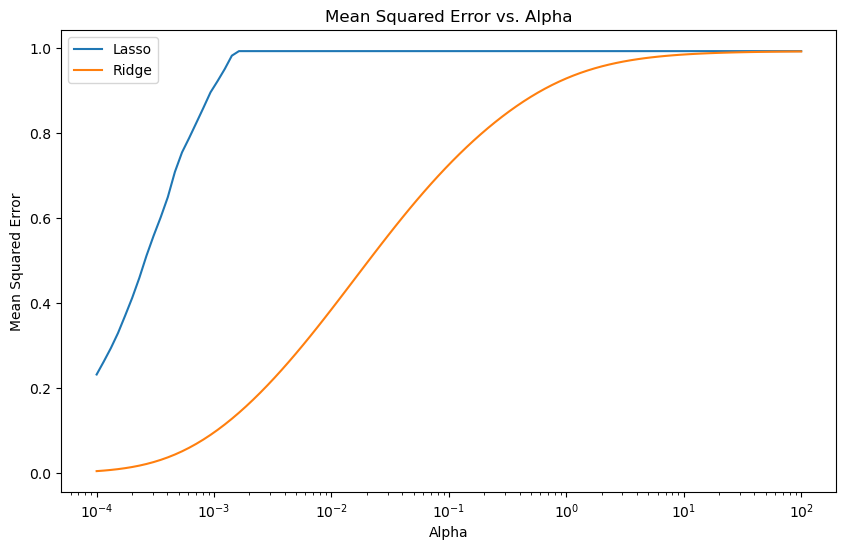

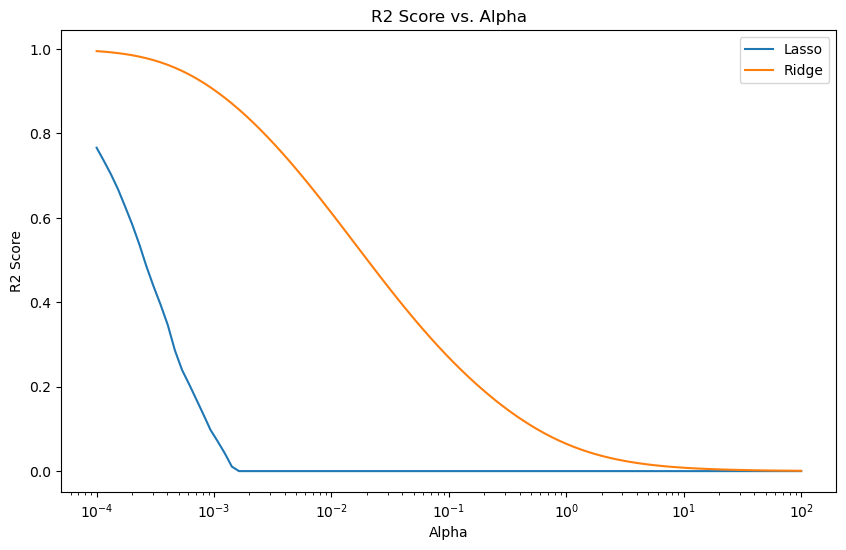

In [95]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

alphas = np.logspace(-4, 2, num=100)  # 设置不同的alpha值范围

# Lasso regression
mse_lasso = []
r2_lasso = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_pred_lasso = lasso.predict(X)
    mse_lasso.append(mean_squared_error(y, y_pred_lasso))
    r2_lasso.append(r2_score(y, y_pred_lasso))

# Ridge regression
mse_ridge = []
r2_ridge = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    y_pred_ridge = ridge.predict(X)
    mse_ridge.append(mean_squared_error(y, y_pred_ridge))
    r2_ridge.append(r2_score(y, y_pred_ridge))

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_lasso, label='Lasso')
plt.plot(alphas, mse_ridge, label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.title('Mean Squared Error vs. Alpha')
plt.legend()
plt.show()

# Plotting R2 score
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_lasso, label='Lasso')
plt.plot(alphas, r2_ridge, label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.title('R2 Score vs. Alpha')
plt.legend()
plt.show()

In [96]:
# Lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)
print('Lasso Regression:')
print('Mean squared error: %.2f' % mse_lasso)
print('Coefficient of determination: %.2f' % r2_lasso)

# Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)
print('Ridge Regression:')
print('Mean squared error: %.2f' % mse_ridge)
print('Coefficient of determination: %.2f' % r2_ridge)

Lasso Regression:
Mean squared error: 0.99
Coefficient of determination: 0.00
Ridge Regression:
Mean squared error: 0.73
Coefficient of determination: 0.27


In [147]:
# apply Random Forest to predict the mean demand
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

# Calculate the percentage of correct predictions in terms of direction
correct_predictions = sum((np.abs(y_pred - y_test ) <= 0.2 ))
total_predictions = len(y_test)
percentage = (correct_predictions / total_predictions) * 100

print('Percentage of correct predictions in terms of direction: %.2f%%' % percentage )

Mean squared error: 1.44
Coefficient of determination: -0.06
Percentage of correct predictions in terms of direction: 10.71%


In [144]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred_ridge))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred_ridge))

# Calculate the percentage of correct predictions in terms of direction
correct_predictions = sum((np.abs(y_pred_ridge - y_test ) <= 0.2 ))
total_predictions = len(y_test)
percentage = (correct_predictions / total_predictions) * 100

print('Percentage of correct predictions in terms of direction: %.2f%%' % percentage )

Mean squared error: 1.34
Coefficient of determination: 0.01
Percentage of correct predictions in terms of direction: 17.86%


In [146]:
# apply other mechine learning models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
regr = GradientBoostingRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

# Calculate the percentage of correct predictions in terms of direction
correct_predictions = sum((np.abs(y_pred - y_test ) <= 0.2 ))
total_predictions = len(y_test)
percentage = (correct_predictions / total_predictions) * 100

print('Percentage of correct predictions in terms of direction: %.2f%%' % percentage )

Mean squared error: 1.23
Coefficient of determination: 0.10
Percentage of correct predictions in terms of direction: 21.43%


### add business numbers as a feature

In [116]:
# get the business number of each CBGID
business_count = business.groupby('CBGID').count()['business_id']
business_count = pd.DataFrame(business_count)
# rename the column
business_count.columns = ['business_count']
business_count.reset_index(level=0,inplace=True)
business_count['CBGID'] = business_count['CBGID'].astype('int64')
business_count.head()

,CBGID,business_count
0,6,2
1,7,3
2,8,3
3,9,4
4,10,16


In [109]:
# linear regression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

Mean squared error: 3.27
Coefficient of determination: -1.40


In [111]:
# apply Random Forest to predict the mean demand
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

Mean squared error: 1.44
Coefficient of determination: -0.06


In [112]:
# apply Gradient Boosting to predict the mean demand
regr = GradientBoostingRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

Mean squared error: 1.12
Coefficient of determination: 0.18


## Use all business poi

In [97]:
# add the mean demand to the poi_embeddings based on the CBGID
poi_embeddings['demand'] = poi_embeddings['CBGID'].map(demand_poi.set_index('CBGID')['Quarter_demand'])
poi_embeddings.fillna(0, inplace=True)
poi_embeddings

,0,1,2,3,4,5,6,7,8,9,...,1529,1530,1531,1532,1533,1534,1535,business_id,CBGID,demand
0,-0.006852,0.008814,0.000569,-0.013993,-0.017298,0.005592,0.028013,-0.007224,-0.032888,-0.016265,...,0.011975,-0.035312,0.020796,-0.032420,0.009792,-0.014667,-0.025093,--OS_I7dnABrXvRCCuWOGQ,483.0,0.000000
1,-0.014156,-0.016827,-0.000455,-0.009675,-0.025025,-0.004720,0.001438,-0.006179,-0.017243,-0.029977,...,-0.011667,-0.032929,0.012244,-0.003804,0.008970,-0.024650,-0.038001,--sXnWH9Xm6_NvIjyuA99w,934.0,7763.846154
2,0.008924,-0.005784,0.008031,-0.016529,-0.027534,-0.000923,0.020884,-0.010964,-0.006822,-0.019414,...,-0.009700,-0.023564,0.025748,-0.015004,-0.012414,-0.032755,-0.032206,-0M0b-XhtFagyLmsBtOe8w,673.0,0.000000
3,0.001950,-0.004120,-0.002840,-0.002131,-0.019651,0.014235,0.013691,-0.008744,-0.002553,-0.027381,...,-0.021538,-0.016633,0.022903,-0.021607,-0.016853,-0.012147,-0.033486,-0TffRSXXIlBYVbb5AwfTg,316.0,0.000000
4,-0.012341,-0.005623,0.008024,-0.013713,-0.023781,0.009278,0.004102,-0.016810,-0.020330,-0.029075,...,-0.015618,-0.021286,0.017295,-0.032844,-0.002571,-0.022949,-0.034369,-0eUa8TsXFFy0FCxHYmrjg,125.0,5564.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12242,0.011285,-0.002581,0.009935,-0.021568,-0.025913,0.005957,-0.008063,-0.038883,-0.015510,-0.008029,...,-0.008838,-0.023252,0.031449,-0.031529,0.000683,-0.008190,-0.029202,zy2p8yfx_fgXMCCUo8nWsA,130.0,3890.923077
12243,-0.006722,0.001079,-0.000382,-0.029725,-0.015056,0.012960,0.022459,-0.014419,-0.008614,-0.010137,...,-0.005739,-0.051451,0.023995,-0.050482,0.009735,-0.001744,-0.052364,zy_g2wKTNIB7EQdG73_Xaw,302.0,0.000000
12244,-0.008711,0.000333,0.021926,-0.039388,-0.033191,-0.004697,-0.005350,-0.023581,-0.004474,-0.019878,...,-0.009020,-0.032456,-0.008784,-0.007353,-0.023620,0.017725,-0.026180,zyge4T5eSiPHq1-IaJb_Qg,229.0,0.000000
12245,-0.023452,0.007114,0.015440,-0.030471,-0.031832,0.032648,0.010760,-0.007557,-0.019834,-0.029193,...,-0.003340,-0.014365,0.027669,-0.001785,-0.008454,-0.006506,-0.040157,zyghhZzPgb1bRAIYB-oi1w,887.0,0.000000


In [98]:
# remove the 0 demand
poi_embeddings_nona = poi_embeddings[poi_embeddings['demand'] != 0]
poi_embeddings_nona

,0,1,2,3,4,5,6,7,8,9,...,1529,1530,1531,1532,1533,1534,1535,business_id,CBGID,demand
1,-0.014156,-0.016827,-0.000455,-0.009675,-0.025025,-0.004720,0.001438,-0.006179,-0.017243,-0.029977,...,-0.011667,-0.032929,0.012244,-0.003804,0.008970,-0.024650,-0.038001,--sXnWH9Xm6_NvIjyuA99w,934.0,7763.846154
4,-0.012341,-0.005623,0.008024,-0.013713,-0.023781,0.009278,0.004102,-0.016810,-0.020330,-0.029075,...,-0.015618,-0.021286,0.017295,-0.032844,-0.002571,-0.022949,-0.034369,-0eUa8TsXFFy0FCxHYmrjg,125.0,5564.769231
7,0.005080,-0.009543,0.006466,0.005653,-0.023272,-0.010024,-0.002830,-0.028843,-0.021447,-0.036170,...,-0.011375,-0.006315,0.031313,-0.029831,-0.021707,-0.019457,-0.025824,-1B9pP_CrRBJYPICE5WbRA,310.0,3246.500000
10,0.002239,-0.031755,0.015131,-0.042051,-0.016231,0.019219,-0.002107,-0.030696,-0.013351,-0.034173,...,-0.013025,-0.013820,0.005008,-0.037107,0.012713,-0.023185,-0.015973,-1yftDfgOUlxe_IACM5PFg,934.0,7763.846154
12,-0.002513,-0.011979,-0.003575,-0.027690,-0.006732,0.031027,0.009377,-0.019177,-0.013300,-0.027717,...,-0.013157,-0.034295,0.025183,-0.006681,-0.021125,-0.019776,-0.042331,-2-ih3mE8KPyeKVIzpBfPQ,197.0,2140.807692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,-0.000092,-0.002448,-0.000872,-0.031499,-0.014859,-0.005146,0.008355,-0.019044,-0.028982,-0.026989,...,-0.006634,-0.015156,0.016230,-0.029039,-0.008928,-0.008030,-0.025066,zvvl3c1FO3O3BZdhusficA,1334.0,765.461538
12235,0.005869,-0.014467,-0.009414,-0.031319,-0.026959,-0.004981,0.010984,-0.023229,-0.006472,-0.021721,...,0.001611,-0.024395,0.028220,-0.024203,-0.002395,0.000540,-0.046430,zwd4dyQ5ovnjVojWfAuhMw,575.0,2590.269231
12238,-0.013105,-0.018995,-0.007812,-0.039587,-0.009565,0.036933,0.011251,-0.016003,-0.018142,-0.035823,...,-0.005172,-0.016449,0.038260,-0.010567,-0.020863,-0.034036,-0.043405,zxWeLWsv6Ebrkb-MDMbD-g,132.0,12135.153846
12242,0.011285,-0.002581,0.009935,-0.021568,-0.025913,0.005957,-0.008063,-0.038883,-0.015510,-0.008029,...,-0.008838,-0.023252,0.031449,-0.031529,0.000683,-0.008190,-0.029202,zy2p8yfx_fgXMCCUo8nWsA,130.0,3890.923077


In [115]:
# X is the columns of the poi_embeddings 1535 columns
X = poi_embeddings.iloc[:, 0:1535]
# y is the mean demand
y = poi_embeddings['demand']
# Normalize the y data
y = (y - y.mean()) / y.std()
# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y, y_pred))

Mean squared error: 0.68
Coefficient of determination: 0.32


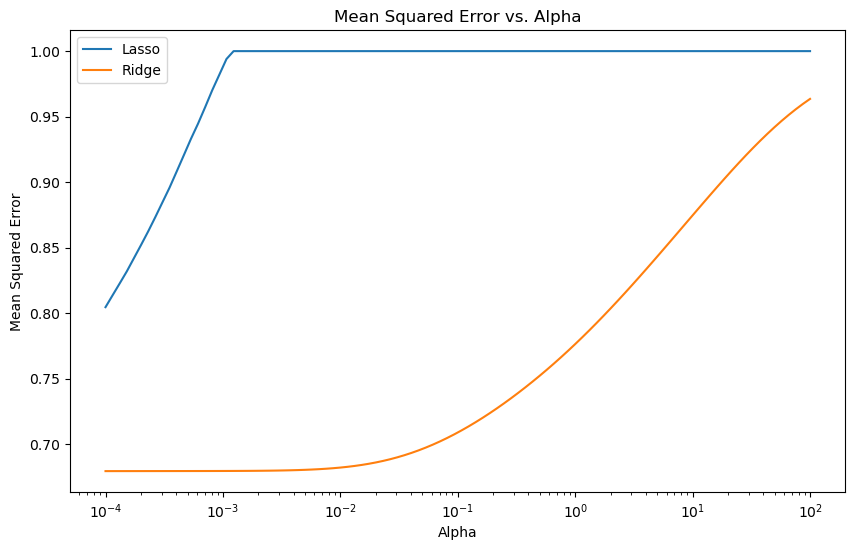

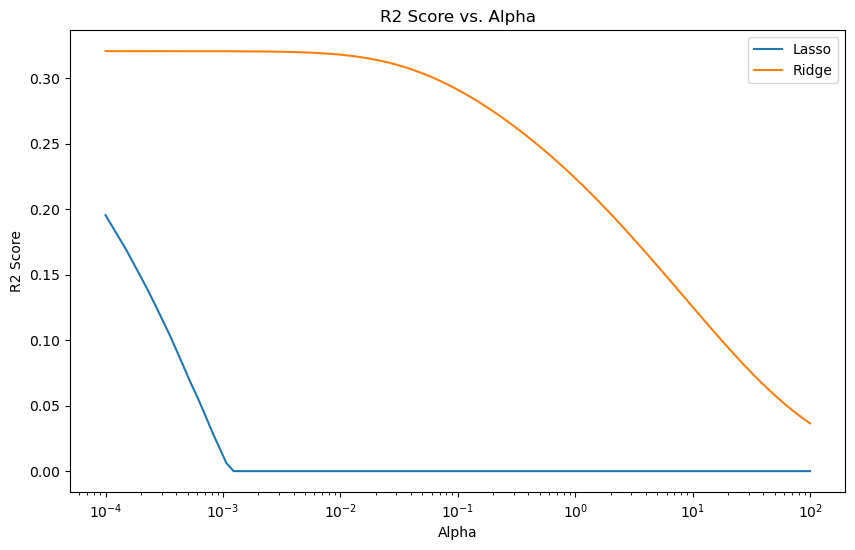

In [100]:
alphas = np.logspace(-4, 2, num=100)  # 设置不同的alpha值范围

# Lasso regression
mse_lasso = []
r2_lasso = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_pred_lasso = lasso.predict(X)
    mse_lasso.append(mean_squared_error(y, y_pred_lasso))
    r2_lasso.append(r2_score(y, y_pred_lasso))

# Ridge regression
mse_ridge = []
r2_ridge = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    y_pred_ridge = ridge.predict(X)
    mse_ridge.append(mean_squared_error(y, y_pred_ridge))
    r2_ridge.append(r2_score(y, y_pred_ridge))

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_lasso, label='Lasso')
plt.plot(alphas, mse_ridge, label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.title('Mean Squared Error vs. Alpha')
plt.legend()
plt.show()

# Plotting R2 score
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_lasso, label='Lasso')
plt.plot(alphas, r2_ridge, label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.title('R2 Score vs. Alpha')
plt.legend()
plt.show()

In [104]:
# Lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)
print('Lasso Regression:')
print('Mean squared error: %.2f' % mse_lasso)
print('Coefficient of determination: %.2f' % r2_lasso)

# Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)
print('Ridge Regression:')
print('Mean squared error: %.2f' % mse_ridge)
print('Coefficient of determination: %.2f' % r2_ridge)

Lasso Regression:
Mean squared error: 1.00
Coefficient of determination: 0.00
Ridge Regression:
Mean squared error: 0.71
Coefficient of determination: 0.29


In [105]:
# X is the columns of the poi_embeddings 1535 columns
X = poi_embeddings_nona.iloc[:, 0:1535]
# y is the mean demand
y = poi_embeddings_nona['demand']
# Normalize the y data
y = (y - y.mean()) / y.std()
# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

Mean squared error: 1.27
Coefficient of determination: -0.21
